# *File name:* **2_A_Lin_Reg.ipynb**

## Code to fit a straight line to a data using gradient descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Input parameters:   $(m,c)$
 $y = m x + c$

In [2]:
m = 0.5    # Slope
c = 4      # Intercept

### Data generation: $ y = m x + c $

In [3]:
L = 10      # Range of x is [0,L]
Np = 50     # Number of data points

In [4]:
x = L * np.random.rand(Np)
y = m * x + c

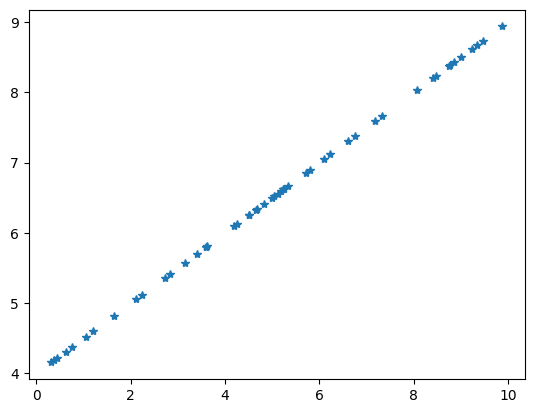

In [5]:
plt.plot(x,y,'*')
plt.show()

### Add noise to data: $ y \rightarrow y + \xi $

(array([ 1.,  1.,  7., 16.,  8.,  9.,  1.,  5.,  1.,  1.]),
 array([-0.58844761, -0.44891217, -0.30937673, -0.16984129, -0.03030585,
         0.10922959,  0.24876503,  0.38830047,  0.52783591,  0.66737135,
         0.80690679]),
 <BarContainer object of 10 artists>)

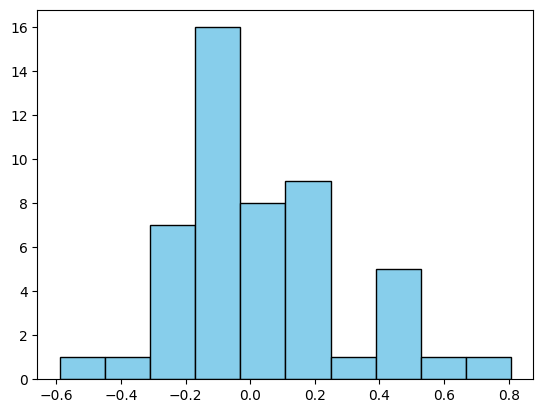

In [6]:
xi = 0.3 * np.random.randn(Np)

plt.hist(xi, bins=10, color='skyblue', edgecolor='black')

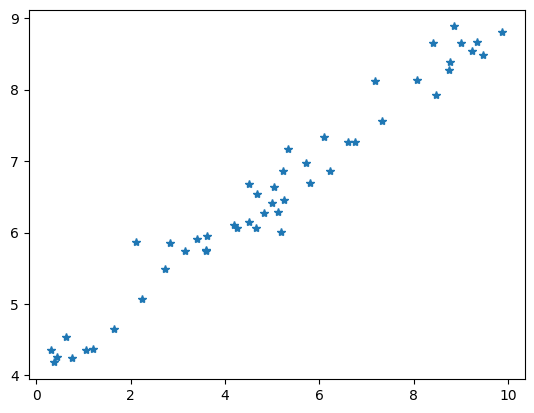

In [7]:
y = y + xi
plt.plot(x,y,'*')

### Initial guess: $(m_0,c_0)$

In [8]:
m0 = 0
c0 = 0

### Loss function:

<div style="border: 2px solid #535353; width: 520px; padding: 10px; background-color: #f2f2f2; border-radius: 8px;">
<div style="background-color: white; padding: 10px; border-radius: 5px; max-width: 500px; overflow: auto;">

$$
E(m,c) = \frac{1}{N_p} \sum_{i=1}^{N_p} (y_i - (m \; x_i + c))^2 
$$

</div>
</div>

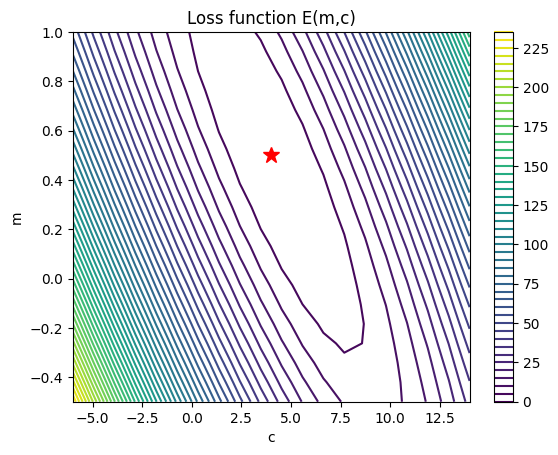

In [9]:
xmin = 0
xmax = L

y1 = m * xmin + c
y2 = m * xmax + c

ymin = np.min([y1,y2])
ymax = np.max([y1,y2])

N_grid = 20

m_grid = np.linspace(-m,2*m,N_grid)
c_grid = np.linspace(c-10,c+10,N_grid)

E = np.zeros((N_grid,N_grid))

for i in range(N_grid):
    for j in range(N_grid):
        for k in range(Np):
            mm = m_grid[i]
            cc = c_grid[j]
            E[i,j] += (y[k] - (mm * x[k] + cc))**2 / Np

plt.contour(c_grid, m_grid, E, levels=50, cmap='viridis')
plt.colorbar()
plt.plot(c, m, 'r*', markersize=12)
plt.xlabel('c')
plt.ylabel('m')
plt.title('Loss function E(m,c)')
plt.show()

### Gradient:

<div style="border: 2px solid #535353; width: 520px; padding: 10px; background-color: #f2f2f2; border-radius: 8px;">
<div style="background-color: white; padding: 10px; border-radius: 5px; max-width: 500px; overflow: auto;">

$$
\frac{\partial E}{\partial m} = -\frac{2}{N_p} \sum_{i=1}^{N_p} x_i \: \left(y_i- (m \: x_i + c)\right) 
$$

$$
\frac{\partial E}{\partial c} = -\frac{2}{N_p} \sum_{i=1}^{N_p} (y_i- (m \: x_i + c)) 
$$

</div>
</div>

### Gradient descent:

<div style="border: 2px solid #535353; width: 420px; padding: 10px; background-color: #f2f2f2; border-radius: 8px;">
<div style="background-color: white; padding: 10px; border-radius: 5px; max-width: 400px; overflow: auto;">

$$
\begin{align*}
m \; & \rightarrow & m - \eta \: \frac{\partial E}{\partial m} \\
c \; & \rightarrow & c - \eta \: \frac{\partial E}{\partial c}
\end{align*}
$$

</div>
</div>

In [10]:
eta = 0.001  # Learning rate
n_iter = 1000

m_curr = m0
c_curr = c0

mm = np.zeros(n_iter)
cc = np.zeros(n_iter)
EE = np.zeros(n_iter)

for it in range(n_iter):
    mm[it] = m_curr
    cc[it] = c_curr
    EE[it] = np.sum((y - (m_curr * x + c_curr))**2) / Np

    dE_dm = 0
    dE_dc = 0
    for i in range(Np):
        dE_dm += -2 * x[i] * (y[i] - (m_curr * x[i] + c_curr)) / Np
        dE_dc += -2 * (y[i] - (m_curr * x[i] + c_curr)) / Np
    
    m_curr = m_curr - eta * dE_dm
    c_curr = c_curr - 10 * eta * dE_dc

In [11]:
m_curr,c_curr,m,c

(np.float64(0.5040929650132144), np.float64(4.003026870304934), 0.5, 4)

### The solution:

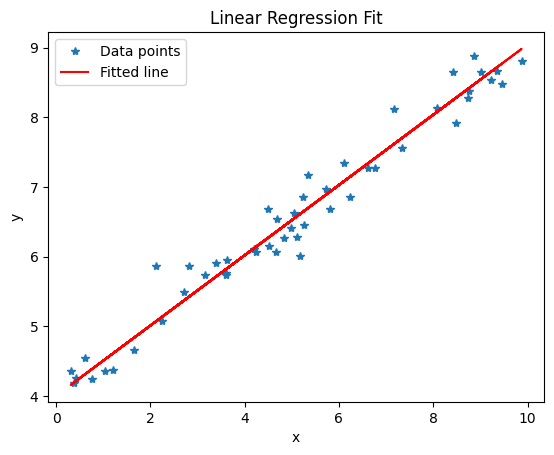

In [12]:
plt.plot(x,y,'*', label='Data points')
y_fit = m_curr * x + c_curr
plt.plot(x, y_fit, 'r-', label='Fitted line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()

### Generate a GIF of the line fit's evolution

In [13]:
# Generate a GIF of the line fit's evolution
import imageio
import imageio.v3 as iio

images = []

for i in range(0, n_iter, n_iter//10):
    plt.plot(x,y,'*', label='Data points')
    y_fit = m * x + c
    plt.plot(x, y_fit, 'y--', label='True line')
    y_fit = mm[i] * x + cc[i]
    plt.plot(x, y_fit, 'r-', label=f'Iter {i}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Linear Regression Fit')
    plt.legend()
    
    filename = 'Fig/tmp.png'
    plt.savefig(filename)
    images.append(imageio.imread(filename))
    plt.close()

iio.imwrite(
    'Fig/linreg_evolution.gif',
    images,
    duration=200,  # Duration of each frame in milliseconds (e.g., 200ms = 0.2 seconds)
    loop=0         # 0 means the GIF will loop indefinitely
)

/tmp/ipykernel_2471134/141203166.py:20: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


![Fit evolution](Fig/linreg_evolution.gif)

## Evolution in the "Energy Landscape":

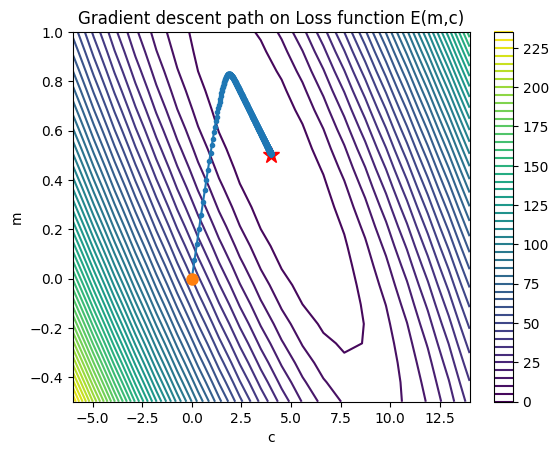

In [14]:
plt.contour(c_grid, m_grid, E, levels=50, cmap='viridis')
plt.colorbar()
plt.plot(c, m, 'r*', markersize=12)
plt.plot(cc, mm, '.-')
plt.plot(cc[0], mm[0], 'o', markersize=8, label='Start')
plt.xlabel('c')
plt.ylabel('m')
plt.title('Gradient descent path on Loss function E(m,c)')
plt.show()

### Evolution of energy:

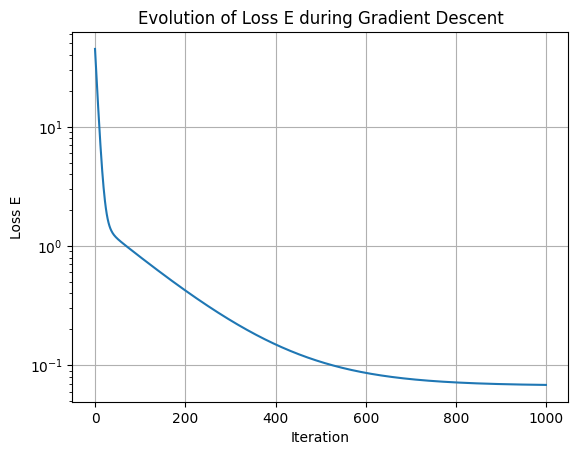

In [15]:
plt.plot(range(n_iter), EE)
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Loss E')
plt.title('Evolution of Loss E during Gradient Descent')
plt.grid(True)
plt.show()